#  Assingment 4

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pandas import Series

In [2]:
#features = pd.read_csv('C://class/king_county_cleansed.csv')
features = pd.read_csv('king_county_cleansed.csv')

In [3]:
features.head(5)

,index,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,sqft_above,sqft_basement,yr_built,...,grade#10,grade#11,grade#12,grade#13,zipcode#98004,zipcode#98102,zipcode#98109,zipcode#98112,zipcode#98039,zipcode#98040
0,16768,437500,3,2.25,1970,35100,0,1970,0,1977,...,0,0,0,0,0,0,0,0,0,0
1,9596,790000,3,2.50,2600,4750,0,1700,900,1951,...,0,0,0,0,0,0,0,0,0,0
2,9587,675000,5,2.50,2820,67518,0,2820,0,1979,...,0,0,0,0,0,0,0,0,0,0
3,20602,555000,4,2.50,3310,6500,0,3310,0,2012,...,0,0,0,0,0,0,0,0,0,0
4,11577,440000,4,2.25,2160,8119,0,1080,1080,1966,...,0,0,0,0,0,0,0,0,0,0


In [4]:
features.describe()

,index,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,sqft_above,sqft_basement,yr_built,...,grade#10,grade#11,grade#12,grade#13,zipcode#98004,zipcode#98102,zipcode#98109,zipcode#98112,zipcode#98039,zipcode#98040
count,21613.00000,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,0.007542,1788.390691,291.509045,1971.005136,...,0.052468,0.018461,0.004164,0.000601,0.014667,0.004858,0.005043,0.012446,0.002313,0.013048
std,6239.28002,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.086517,828.090978,442.575043,29.373411,...,0.222975,0.134615,0.064397,0.024518,0.120219,0.069533,0.070838,0.110869,0.048043,0.113482
min,0.00000,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,0.000000,290.000000,0.000000,1900.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5403.00000,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,0.000000,1190.000000,0.000000,1951.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,10806.00000,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,0.000000,1560.000000,0.000000,1975.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,16209.00000,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,0.000000,2210.000000,560.000000,1997.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,21612.00000,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,1.000000,9410.000000,4820.000000,2015.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
corr = features.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(190, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [6]:
plt.matshow(features.corr())

In [7]:
median_price = features.loc[:,"price"].median()
print(median_price)

450000.0


Adding column to dataframe for holding categorical price value : HIGH/LOW

All values < median are LOW and Values >= median are HIGH

In [8]:
features['price_cat'] = features['price'].apply(lambda x: 1 if x > median_price else -1)

In [9]:
features[['price','price_cat']].head(10)

,price,price_cat
0,437500,-1
1,790000,1
2,675000,1
3,555000,1
4,440000,-1
5,295000,-1
6,470000,1
7,550000,1
8,313000,-1
9,626000,1


In [10]:
features.head(5)

,index,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,sqft_above,sqft_basement,yr_built,...,grade#11,grade#12,grade#13,zipcode#98004,zipcode#98102,zipcode#98109,zipcode#98112,zipcode#98039,zipcode#98040,price_cat
0,16768,437500,3,2.25,1970,35100,0,1970,0,1977,...,0,0,0,0,0,0,0,0,0,-1
1,9596,790000,3,2.50,2600,4750,0,1700,900,1951,...,0,0,0,0,0,0,0,0,0,1
2,9587,675000,5,2.50,2820,67518,0,2820,0,1979,...,0,0,0,0,0,0,0,0,0,1
3,20602,555000,4,2.50,3310,6500,0,3310,0,2012,...,0,0,0,0,0,0,0,0,0,1
4,11577,440000,4,2.25,2160,8119,0,1080,1080,1966,...,0,0,0,0,0,0,0,0,0,-1


## Random Forest Classifier


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
features.columns

Index(['index', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'waterfront', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'basement_present',
       'renovated', 'floors#1.0', 'floors#1.5', 'floors#2.0', 'floors#2.5',
       'floors#3.0', 'floors#3.5', 'view#0', 'view#1', 'view#2', 'view#3',
       'view#4', 'condition#1', 'condition#2', 'condition#3', 'condition#4',
       'condition#5', 'grade#1', 'grade#3', 'grade#4', 'grade#5', 'grade#6',
       'grade#7', 'grade#8', 'grade#9', 'grade#10', 'grade#11', 'grade#12',
       'grade#13', 'zipcode#98004', 'zipcode#98102', 'zipcode#98109',
       'zipcode#98112', 'zipcode#98039', 'zipcode#98040', 'price_cat'],
      dtype='object')

In [13]:
X_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'waterfront', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'basement_present',
       'renovated', 'floors#1.0', 'floors#1.5', 'floors#2.0', 'floors#2.5',
       'floors#3.0', 'floors#3.5', 'view#0', 'view#1', 'view#2', 'view#3',
       'view#4', 'condition#1', 'condition#2', 'condition#3', 'condition#4',
       'condition#5', 'grade#1', 'grade#3', 'grade#4', 'grade#5', 'grade#6',
       'grade#7', 'grade#8', 'grade#9', 'grade#10', 'grade#11', 'grade#12',
       'grade#13', 'zipcode#98004', 'zipcode#98102', 'zipcode#98109',
       'zipcode#98112', 'zipcode#98039', 'zipcode#98040']

X=features[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'waterfront', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'basement_present',
       'renovated', 'floors#1.0', 'floors#1.5', 'floors#2.0', 'floors#2.5',
       'floors#3.0', 'floors#3.5', 'view#0', 'view#1', 'view#2', 'view#3',
       'view#4', 'condition#1', 'condition#2', 'condition#3', 'condition#4',
       'condition#5', 'grade#1', 'grade#3', 'grade#4', 'grade#5', 'grade#6',
       'grade#7', 'grade#8', 'grade#9', 'grade#10', 'grade#11', 'grade#12',
       'grade#13', 'zipcode#98004', 'zipcode#98102', 'zipcode#98109',
       'zipcode#98112', 'zipcode#98039', 'zipcode#98040']]  # Features

y=features['price_cat']  # Labels
       
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [14]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)


In [15]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
#print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


In [17]:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [18]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=X_features).sort_values(ascending=False)
feature_imp

lat                 2.702793e-01
sqft_living         1.247049e-01
sqft_living15       1.010732e-01
sqft_above          6.838085e-02
long                5.759693e-02
sqft_lot15          5.094856e-02
yr_built            5.004348e-02
sqft_lot            4.982521e-02
bathrooms           3.644727e-02
grade#7             2.664516e-02
sqft_basement       2.568483e-02
grade#6             1.721653e-02
grade#9             1.673844e-02
bedrooms            1.567485e-02
grade#8             1.190362e-02
floors#1.0          9.298716e-03
basement_present    8.365742e-03
view#0              8.028255e-03
grade#10            6.704100e-03
condition#3         6.191921e-03
floors#2.0          5.345627e-03
condition#4         4.396050e-03
floors#1.5          3.885096e-03
condition#5         3.153582e-03
yr_renovated        3.036133e-03
view#2              1.969029e-03
renovated           1.828300e-03
view#3              1.455478e-03
zipcode#98004       1.444163e-03
waterfront          1.403198e-03
grade#11  

In [19]:
top_features = feature_imp.head(10)
top_features

lat              0.270279
sqft_living      0.124705
sqft_living15    0.101073
sqft_above       0.068381
long             0.057597
sqft_lot15       0.050949
yr_built         0.050043
sqft_lot         0.049825
bathrooms        0.036447
grade#7          0.026645
dtype: float64

No handles with labels found to put in legend.


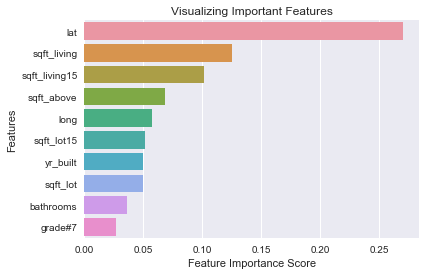

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=top_features, y=top_features.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [21]:
from pprint import pprint

In [22]:
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(clf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_split': 1e-07,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [23]:
from sklearn.model_selection import RandomizedSearchCV

In [24]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2, 10, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [2, 4]
# Method of selecting samples for training each tree
#bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
pprint(random_grid)

{'max_depth': [2, 4, 6, 8, 10, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [2, 4],
 'min_samples_split': [5, 10],
 'n_estimators': [10, 57, 105, 152, 200]}


In [25]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
clf_base = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
clf_random = RandomizedSearchCV(estimator = clf_base, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
clf_random.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=2 
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=2 
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=2 
[CV] n_estimators=57, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=2 
[CV] n_estimators=57, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=2 
[CV] n_estimators=57, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=2 
[CV] n_estimators=152, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=6 
[CV] n_estimators=152, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=6 
[CV]  n_estimators=57, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=2, total=   0.5s
[CV] n_estimators=152, min_samples_split=5, min_samples_le

[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    8.6s


[CV] n_estimators=57, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None 
[CV] n_estimators=57, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None 
[CV]  n_estimators=152, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=None, total=   3.9s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=6 
[CV]  n_estimators=152, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=None, total=   4.0s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=6 
[CV]  n_estimators=152, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=8, total=   2.9s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=6 
[CV]  n_estimators=152, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=8, total=   2.8s
[CV] n_estimators=152, min_samples_split=10, min_samples_leaf=2,

[CV]  n_estimators=10, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=2, total=   0.1s
[CV] n_estimators=57, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV] n_estimators=10, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=8 
[CV]  n_estimators=10, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=2, total=   0.1s
[CV] n_estimators=10, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=8 
[CV]  n_estimators=10, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=None, total=   0.3s
[CV] n_estimators=10, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=8 
[CV]  n_estimators=10, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=8, total=   0.2s
[CV] n_estimators=10, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=2 
[CV]  n_estimators=10, min_samples_split=5, min_samples_leaf=4, max_features=sq

[CV]  n_estimators=10, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=4, total=   0.1s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=4 
[CV]  n_estimators=10, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=4, total=   0.1s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=4 
[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=4, total=   2.2s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=4 
[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=4, total=   2.2s
[CV] n_estimators=10, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=105, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=10, total=   2.1s
[CV] n_estimators=10, min_samples_split=10, min_sample

[CV] n_estimators=57, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=10 
[CV]  n_estimators=152, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=2, total=   1.4s
[CV] n_estimators=57, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   33.8s


[CV]  n_estimators=57, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=10, total=   1.4s
[CV] n_estimators=57, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=10 
[CV]  n_estimators=57, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=10, total=   1.4s
[CV] n_estimators=105, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None 
[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=8, total=   4.0s
[CV]  n_estimators=57, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=10, total=   1.4s
[CV] n_estimators=105, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None 
[CV] n_estimators=105, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None 
[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=8, total=   4.0s
[CV]  n_estimators=200, min_samples_split=1

[CV] n_estimators=57, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=6 
[CV]  n_estimators=57, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=8, total=   1.1s
[CV] n_estimators=152, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=4 
[CV]  n_estimators=57, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=6, total=   1.0s
[CV] n_estimators=152, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=4 
[CV]  n_estimators=105, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=4, total=   1.4s
[CV] n_estimators=152, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=4 
[CV]  n_estimators=105, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=4, total=   1.3s
[CV]  n_estimators=105, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=4, total=   1.4s
[CV] n_estimators=152, min_samples_split=10, min_samples_

[CV]  n_estimators=57, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=4, total=   0.7s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=105, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=6, total=   1.6s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=105, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=6, total=   1.6s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=57, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=4, total=   0.7s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=8 
[CV]  n_estimators=105, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=6, total=   1.6s
[CV] n_estimators=200, min_samples_split=10, min_samples_

[CV] n_estimators=152, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=8 
[CV]  n_estimators=152, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=2, total=   1.2s
[CV] n_estimators=152, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=8 
[CV]  n_estimators=105, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=4, total=   1.2s
[CV] n_estimators=152, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=8 
[CV]  n_estimators=105, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=4, total=   1.2s
[CV] n_estimators=57, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=105, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=4, total=   1.2s
[CV] n_estimators=57, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=57, min_samples_split=5, min_samples_leaf=2, max_feat

[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.3min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
          fit_params={}, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [10, 57, 105, 152, 200], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4, 6, 8, 10, None], 'min_samples_split': [5, 10], 'min_samples_leaf': [2, 4]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score=True, scoring=None, verbose=2)

In [26]:
clf_random.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 200}

### Evaluate Random Search

In [27]:
## Common Classification algorithm evaluator. It returns the roc_auc
from sklearn.metrics import roc_curve, auc
def evaluate(model, X_train,y_train, X_test, y_test):
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predictions)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    #print(roc)
    return roc_auc

In [28]:
base_model = RandomForestClassifier(n_estimators = 10, random_state = 42)

In [29]:
best_random = clf_random.best_estimator_

In [30]:
print('ROC for base model : ' + str(evaluate(base_model,X_train,y_train, X_test, y_test)))
print('ROC for best model : ' + str(evaluate(best_random,X_train,y_train, X_test, y_test)))

ROC for base model : 0.898589796291
ROC for best model : 0.9063268856


### Grid Search with Cross Validation

In [31]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_features': ['auto'],
    'min_samples_leaf': [1,2,3],
    'min_samples_split': [3,5,7],
    'n_estimators': [100, 200, 2000]
}
# Create a based model
clf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = clf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [32]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] bootstrap=True, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=100 
[CV] bootstrap=True, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=100 
[CV] bootstrap=True, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=100 
[CV] bootstrap=True, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=200 
[CV] bootstrap=True, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=200 
[CV] bootstrap=True, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=200 
[CV] bootstrap=True, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=2000 
[CV] bootstrap=True, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=2000 
[CV]  bootstrap=True, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=100, total=   2.6s
[CV] bootstrap=True, max_featur

[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.2min


[CV]  bootstrap=True, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=2000, total=  55.1s
[CV] bootstrap=True, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=2000 
[CV]  bootstrap=True, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=2000, total=  54.5s
[CV] bootstrap=True, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=2000 
[CV]  bootstrap=True, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=200, total=   5.0s
[CV] bootstrap=True, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=2000 
[CV]  bootstrap=True, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=200, total=   5.0s
[CV] bootstrap=True, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100 
[CV]  bootstrap=True, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=200, total=   4.8s
[CV] bootstrap=True, max_feat

[CV] bootstrap=True, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=2000 
[CV]  bootstrap=True, max_features=auto, min_samples_leaf=2, min_samples_split=7, n_estimators=2000, total=  52.0s
[CV] bootstrap=True, max_features=auto, min_samples_leaf=3, min_samples_split=7, n_estimators=100 
[CV]  bootstrap=True, max_features=auto, min_samples_leaf=3, min_samples_split=7, n_estimators=100, total=   2.5s
[CV] bootstrap=True, max_features=auto, min_samples_leaf=3, min_samples_split=7, n_estimators=100 
[CV]  bootstrap=True, max_features=auto, min_samples_leaf=3, min_samples_split=7, n_estimators=100, total=   2.4s
[CV] bootstrap=True, max_features=auto, min_samples_leaf=3, min_samples_split=7, n_estimators=100 
[CV]  bootstrap=True, max_features=auto, min_samples_leaf=2, min_samples_split=7, n_estimators=2000, total=  50.9s
[CV] bootstrap=True, max_features=auto, min_samples_leaf=3, min_samples_split=7, n_estimators=200 
[CV]  bootstrap=True, max_features=auto, min_s

[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:  4.0min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'bootstrap': [True], 'max_features': ['auto'], 'min_samples_leaf': [1, 2, 3], 'min_samples_split': [3, 5, 7], 'n_estimators': [100, 200, 2000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=2)

In [33]:
grid_search.best_params_

{'bootstrap': True,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 200}

In [34]:
best_grid = grid_search.best_estimator_

In [35]:
print('ROC for best grid search model : ' + str(evaluate(best_grid,X_train,y_train, X_test, y_test)))

ROC for best grid search model : 0.906188910204


### Now lets implement XGBoost (eXtreme Gradient Boosting) 

In [36]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

/Users/bear/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [37]:
# fit model on training data
xgBoostClassifierModel = XGBClassifier()
xgBoostClassifierModel.fit(X_train, y_train)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [38]:
# make predictions for test data
y_pred = xgBoostClassifierModel.predict(X_test)
predictions = [round(value) for value in y_pred]

In [39]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 90.64%


In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

Best: -0.215438 using {'n_estimators': 350}
-0.258892 (0.011073) with: {'n_estimators': 50}
-0.233500 (0.012006) with: {'n_estimators': 100}
-0.224075 (0.012995) with: {'n_estimators': 150}
-0.219852 (0.012951) with: {'n_estimators': 200}
-0.217450 (0.013438) with: {'n_estimators': 250}
-0.216153 (0.013626) with: {'n_estimators': 300}
-0.215438 (0.013285) with: {'n_estimators': 350}


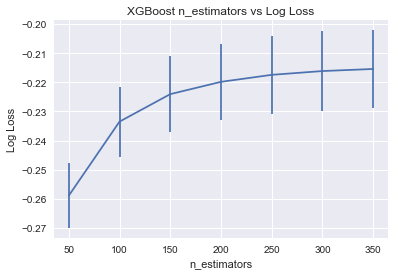

In [41]:
model = XGBClassifier()
n_estimators = range(50, 400, 50)
param_grid = dict(n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))
# plot
plt.errorbar(n_estimators, means, yerr=stds)
plt.title("XGBoost n_estimators vs Log Loss")
plt.xlabel('n_estimators')
plt.ylabel('Log Loss')
plt.savefig('n_estimators.png')

ValueError: shape mismatch: objects cannot be broadcast to a single shape

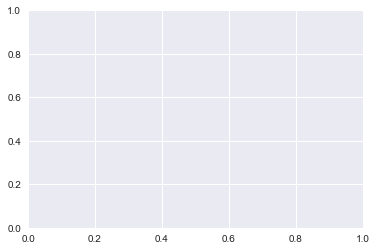

In [42]:
# plot
plt.errorbar(max_depth, means, yerr=stds)
plt.title("XGBoost max_depth vs Log Loss")
plt.xlabel('max_depth')
plt.ylabel('Log Loss')
plt.savefig('max_depth.png')

In [ ]:
# grid search
model = XGBClassifier()
n_estimators = [350, 300, 250, 400]
max_depth = [6, 7, 8, 9]
print(max_depth)
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))


In [ ]:
# plot results
scores = np.array(means).reshape(len(max_depth), len(n_estimators))
for i, value in enumerate(max_depth):
    plt.plot(n_estimators, scores[i], label='depth: ' + str(value))
plt.legend()
plt.xlabel('n_estimators')
plt.ylabel('Log Loss')
plt.savefig('n_estimators_vs_max_depth.png')

## Creating the model with the best values for Hyper parameters


In [ ]:
model = XGBClassifier(max_depth=6, n_estimators=250)

In [ ]:
print(model)

In [ ]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [ ]:
print('ROC for the XGBoost model is: ' + str(evaluate(model, X_train,y_train, X_test, y_test)))

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [ ]:
features['price_cat_log'] = features['price'].apply(lambda x: 1 if x > median_price else 0)

In [ ]:
features.columns

In [ ]:
price_cat_log=features['price_cat_log']
y_log=price_cat_log
x_log=np.column_stack((sqft_living, bedrooms))
x_log=sm.add_constant(x_log,prepend=True)

In [ ]:
X_train_log,X_test_log,y_train_log,y_test_log=train_test_split(features[['bedrooms', 'sqft_living', 'waterfront', 'sqft_basement', 'yr_built', 'bathrooms']]
                                                               ,y_log,test_size=0.3,random_state=0)

In [ ]:
logreg=LogisticRegression().fit(X_train_log,y_train_log)
logreg
print("Training set score: {:.3f}".format(logreg.score(X_train_log,y_train_log)))
print("Test set score: {:.3f}".format(logreg.score(X_test_log,y_test_log)))

In [ ]:
logit_model=sm.Logit(y_train_log,X_train_log)
result=logit_model.fit()
print(result.summary())

### Looking at the z scores, we know that, sqft_living is the most significant followed by yr_built and then the rest.

In [ ]:
from sklearn.metrics import roc_curve
falsepos,truepos,thresholds=roc_curve(y_test_log,logreg.decision_function(X_test_log))

plt.plot(falsepos,truepos,label="ROC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

cutoff=np.argmin(np.abs(thresholds))
plt.plot(falsepos[cutoff],truepos[cutoff],'o',markersize=10,label="cutoff",fillstyle="none")
plt.show()

In [ ]:
from sklearn import metrics
metrics.auc(falsepos, truepos)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

* estimators = number of trees in the foreset
* max_features = max number of features considered for splitting a node
* max_depth = max number of levels in each decision tree
* min_samples_split = min number of data points placed in a node before the node is split
* min_samples_leaf = min number of data points allowed in a leaf node
* bootstrap = method for sampling data points (with or without replacement)

In [ ]:
X_features_reg = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'waterfront', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'basement_present',
       'renovated', 'floors#1.0', 'floors#1.5', 'floors#2.0', 'floors#2.5',
       'floors#3.0', 'floors#3.5', 'view#0', 'view#1', 'view#2', 'view#3',
       'view#4', 'condition#1', 'condition#2', 'condition#3', 'condition#4',
       'condition#5', 'grade#1', 'grade#3', 'grade#4', 'grade#5', 'grade#6',
       'grade#7', 'grade#8', 'grade#9', 'grade#10', 'grade#11', 'grade#12',
       'grade#13', 'zipcode#98004', 'zipcode#98102', 'zipcode#98109',
       'zipcode#98112', 'zipcode#98039', 'zipcode#98040']

X_reg=features[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'waterfront', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'basement_present',
       'renovated', 'floors#1.0', 'floors#1.5', 'floors#2.0', 'floors#2.5',
       'floors#3.0', 'floors#3.5', 'view#0', 'view#1', 'view#2', 'view#3',
       'view#4', 'condition#1', 'condition#2', 'condition#3', 'condition#4',
       'condition#5', 'grade#1', 'grade#3', 'grade#4', 'grade#5', 'grade#6',
       'grade#7', 'grade#8', 'grade#9', 'grade#10', 'grade#11', 'grade#12',
       'grade#13', 'zipcode#98004', 'zipcode#98102', 'zipcode#98109',
       'zipcode#98112', 'zipcode#98039', 'zipcode#98040']]  # Features

y_reg=features['price']  # Labels
       
# Split dataset into training set and test set
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.3) # 70% training and 30% test

### Random Search Cross Validation in Scikit-Learn

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2, 10, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [2, 4]
# Method of selecting samples for training each tree
#bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
pprint(random_grid)

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train_reg, y_train_reg)

In [ ]:
def evaluate_reg(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train_reg, y_train_reg)
base_accuracy = evaluate_reg(base_model, X_test_reg, y_test_reg)

In [ ]:
rf_random.best_estimator_

In [ ]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate_reg(best_random, X_test_reg, y_test_reg)

### Grid Search with Cross Validation

In [ ]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True, False],
    'max_depth': [None],
    'max_features': [2, 3],
    'min_samples_leaf': [2,3,4],
    'min_samples_split': [3,5,7],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
# Fit the grid search to the data
grid_search.fit(X_train_reg, y_train_reg)
grid_search.best_params_

In [ ]:
grid_search.best_params_

In [ ]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate_reg(best_grid, X_test_reg, y_test_reg)

In [ ]:
#print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

## Now lets implement XGBoost (eXtreme Gradient Boosting)

In [ ]:
from xgboost import XGBRegressor

In [ ]:
base_model = XGBRegressor()
base_model.fit(X_train_reg, y_train_reg)
base_accuracy = evaluate_reg(base_model, X_test_reg, y_test_reg)

In [ ]:
base_model

In [ ]:
model = XGBRegressor()
n_estimators = range(50, 400, 50)
param_grid = dict(n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))


In [ ]:
model = XGBRegressor()
max_depth = range(1, 11, 2)
print(max_depth)
param_grid = dict(max_depth=max_depth)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(X_train_reg, y_train_reg)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))


In [ ]:
# grid search
model = XGBRegressor()
n_estimators = [300,350,400]
max_depth = [4,5,6,7]
print(max_depth)
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
best_XGBoost = grid_result.best_estimator_
best_XGBoost

In [ ]:
best_XGBoost.fit(X_train_reg, y_train_reg)
best_accuracy = evaluate_reg(best_XGBoost, X_test_reg, y_test_reg)

### XGBoost Algo provides better predictions than Random Forest for the regression problem. And both of them provide a lower RMSE than Linear Regression

#### Evaluating the regression models


In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
#Random Forest best model
print('Random forest best model RMSE is : ' + str(round(sqrt(mean_squared_error(best_random.predict(X_test_reg), y_test_reg)),2)))

In [ ]:
#XGBoost Best model
print('XGBoost best model RMSE is : ' + str(round(sqrt(mean_squared_error(best_XGBoost.predict(X_test_reg), y_test_reg)),2)))

In [ ]:
#Linear regression - multiple linear regression model from previous assignment
print('Linear regression best model from Assignment 3: ' + str(205986.42))